# Problem Set 6
## [Submittedy by Zhihan Yu]

## Problem 1

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.integrate import quad
import scipy.optimize as opt
from statsmodels.api import OLS, Logit
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

### Problem 1(a)
Let's load in the data and take a peek at it. 

In [2]:
Auto_df = pd.read_csv('data/Auto.csv',na_values = "?") # This came from manually seeing the dataset. 
Auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### Problem 1(b)
Let's plot it using the command given to us. It's interesting that we are using the pandas buit-in graphing method and not using matplotlib. I presume this is because everything is self-contained in this pandas dataframe object.

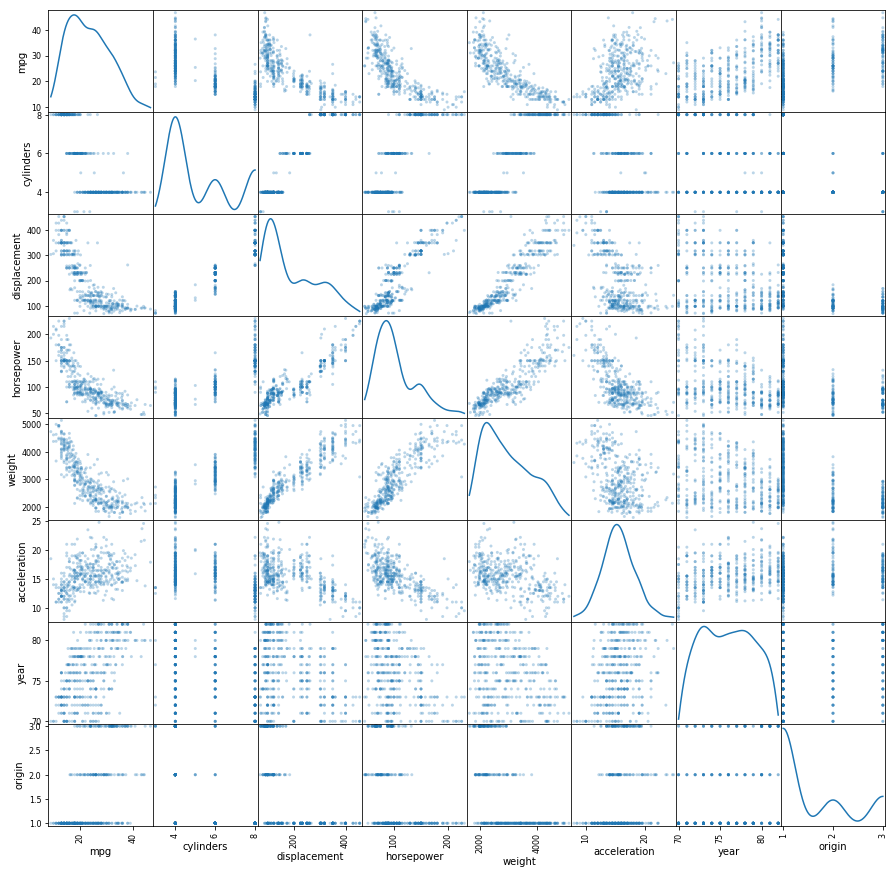

In [3]:
from pandas.plotting import scatter_matrix
scatter_matrix(Auto_df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration","year", "origin"]], 
               alpha=0.3, figsize=(15, 15), diagonal='kde')
plt.show()

### Problem 1(c)
Compute the correlation matrix for the quantitative variables. 

In [4]:
Auto_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


### Problem 1(d)
Let's run OLS for the following model: 
$$ mpg_{i} = \beta_0 + \beta_1 cylinders_i + \beta_2 displacement_i + \beta_3horsepower_i + \beta_4 weight_i + \beta_5 acceleration_i + \beta_6 year_i + beta_7 origin_i + u_i $$

In [5]:
# Create a dummy column of constants
Auto_df['cons'] = 1

Auto_df['cons'] = 1
reg = OLS(Auto_df["mpg"],Auto_df[['cons',"cylinders", "displacement", "horsepower", "weight", "acceleration","year", "origin"]],missing='drop')
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          2.04e-139
Time:                        13:50:35   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cons           -17.2184      4.644     -3.707   

#### (i)
From the above regression table, we see that [__displacement, weight, year, origin__] are statistically significant at the 1% level.

#### (ii)
From the above regression table, we see that [__cylinders, horsepower, acceleration__] are not statistically significant at the 10% level.

#### (iii)
The coefficient on 'year' indicates that holding everything else (the other variables in the regression) constant, an increase in 1 year of the production date of the vehicle will result in a increase of 0.7508 miles per gallon of the vehicle. 


### Problem 1(e)
Looking across the first row of the figure presented in (b), I think the there could be non-linearities in the relationship between MPG and [displacement, horsepower, weight]. Here, I'll have to square these terms.
#### (i)

In [6]:
Auto_df['displacement_sqr'] = Auto_df['displacement']**2
Auto_df['horsepower_sqr'] = Auto_df['horsepower']**2
Auto_df['weight_sqr'] = Auto_df['weight']**2
Auto_df['acceleration_sqr'] = Auto_df['acceleration']**2
indpendentvars = Auto_df[["cons","cylinders", "displacement", "horsepower", "weight", "acceleration","year", \
                       "origin", "displacement_sqr", "horsepower_sqr", "weight_sqr", "acceleration_sqr"]]
reg2 = OLS(Auto_df["mpg"],indpendentvars,missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Tue, 19 Feb 2019   Prob (F-statistic):          1.75e-160
Time:                        13:50:35   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cons                20.1084      6.696  

#### (ii)
The adjusted R-squared this time through is 0.866, higher than before (0.818).

#### (iii)
The statistical significance of displacement on mpg no longer holds at the 1% level.

#### (iv)
The statistical significance of number of cylinders on mpg is not siginificant at the 10% level, as it was before.

### Problem 1(f)

In [7]:
print('For a car with \
      \n 6 cylinders, \
      \n displacement of 200, \
      \n horsepower of 100, \
      \n a weight of 3,100, \
      \n acceleration of 15.1, \
      \n model year of 1999, \
      \n and origin of 1, \
      \n it has an expected MPG of', \
      results2.predict(exog=[1, 6, 300, 100, 3100, 15.1, 99, 1, \
                             300**2, 100**2, 3100**2, 15.1**2])[0])

For a car with       
 6 cylinders,       
 displacement of 200,       
 horsepower of 100,       
 a weight of 3,100,       
 acceleration of 15.1,       
 model year of 1999,       
 and origin of 1,       
 it has an expected MPG of 38.1676093042316


### Problem 2(a)

In [8]:
Points = np.array([[0,3,0],[2,0,0],[0,1,3],[0,1,2],[-1,0,1],[1,1,1]])
Distance = np.zeros((6,1))
for i in range(Points.shape[0]):
    Distance[i,0] = np.sqrt((Points[i,0]-0)**2+(Points[i,1]-0)**2+(Points[i,2]-0)**2)
    
observation_distance_lst = [] # Intuition says to use dictionary BUT dictionaries cannot be sorted easily. So i use tuples
for i in range(Points.shape[0]):
    observation_distance_lst.append((Distance[i,0], 'obs%s'%(i+1)))
    print("The distance from (0,0,0) to observation", i+1, "is",Distance[i,0])

print("------------------------------")
# Print the order to make life simple
print("The order is as follows (nearst to furthest): ")
for tup in sorted(observation_distance_lst):
    print ('  ' + tup[1] + ' with distance (%0.3f)'%(tup[0]))
    

The distance from (0,0,0) to observation 1 is 3.0
The distance from (0,0,0) to observation 2 is 2.0
The distance from (0,0,0) to observation 3 is 3.1622776601683795
The distance from (0,0,0) to observation 4 is 2.23606797749979
The distance from (0,0,0) to observation 5 is 1.4142135623730951
The distance from (0,0,0) to observation 6 is 1.7320508075688772
------------------------------
The order is as follows (nearst to furthest): 
  obs5 with distance (1.414)
  obs6 with distance (1.732)
  obs2 with distance (2.000)
  obs4 with distance (2.236)
  obs1 with distance (3.000)
  obs3 with distance (3.162)


### Problem 2(b)
When K = 1 the KNN predicts green, because the y-value of nearest point is green.

### Problem 2(c)
When K = 3 the KNN predicts red. The three nearest points are obs2, obs5, and obs6. Specifically, 
$$y_2 = red$$ $$y_5 = green $$ $$ y_6 = red $$

### Problem 2(d)
If the Bayes(optimal) decision boundary in this problem is highly non-linear, then we would expect the best value for K to be high. This is becuase when K is large, it can capture the features of surrounding points in all directions better. If K is small, then points in some directions might be neglected. Thus, under the assumption that the boundary is highly non-linear, small K's may prove problematic.

### Problem 2(e)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

y_vals = np.array(['red','red','red','green','green','red']).reshape(-1,1)
test_point = np.array([1,1,1]).reshape(1,3)
knn = KNeighborsClassifier(n_neighbors=2).fit(Points, y_vals.ravel())
print('The KNN classifier of (1,1,1) is', knn.predict(test_point)[0])

The KNN classifier of (1,1,1) is green


### Problem 3(a)


In [23]:
# Gonna reload my data cleanly as I changed it a little in problem 1
Auto_df = pd.read_csv('data/Auto.csv',na_values = "?") # This came from manually seeing the dataset. 
Auto_df['cons'] = 1

Median = Auto_df['mpg'].median()
Auto_df['mpg_high'] = (Auto_df['mpg']>=Median)

mpg_high = np.zeros(397)
for i in range(397):
    mpg_high[i] = Auto_df['mpg_high'][i]
mpg_high = pd.Series(mpg_high)
reg3 = Logit(mpg_high,Auto_df[['cons',"cylinders", "displacement", "horsepower", "weight", "acceleration","year", "origin"]],missing='drop')
results3 = reg3.fit()
print(results3.summary2())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.710     
Dependent Variable: y                AIC:              173.5398  
Date:               2019-02-19 13:57 BIC:              205.3099  
No. Observations:   392              Log-Likelihood:   -78.770   
Df Model:           7                LL-Null:          -271.71   
Df Residuals:       384              LLR p-value:      2.5305e-79
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-----------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
cons            -17.1549   5.7638 -2.9763 0.0029 -28.4517 -5.8580
cylinders        -0.1626   0.4232 -0.3842 0.7008  -0.9920  0.6669


At the 5% level, weight and year are statistically significant.

### Problem 3(b and c)

In [27]:
X_train, X_test, y_train, y_test = \
train_test_split(Auto_df[['cons',"cylinders", "displacement", "horsepower", "weight", "acceleration","year", "origin"]],
                 mpg_high, test_size = 0.5, random_state=10)

reg4 = Logit(y_train,X_train,missing='drop')
results4 = reg4.fit()
print(results4.summary2())

Optimization terminated successfully.
         Current function value: 0.135036
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.804     
Dependent Variable: y                AIC:              69.2040   
Date:               2019-02-19 13:58 BIC:              95.4696   
No. Observations:   197              Log-Likelihood:   -26.602   
Df Model:           7                LL-Null:          -135.98   
Df Residuals:       189              LLR p-value:      1.2137e-43
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
-----------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------
cons            -19.8893  10.9886 -1.8100 0.0703 -41.4265  1.6480
cylinders        -0.4658   0.9009 -0.5170 0.6051  -2.2314  1.2999

The estimated parameters are as follows:
$$\beta_0 = -19.8893$$
$$\beta_1 = -0.4658$$
$$\beta_2 = 0.0061$$
$$\beta_3 = -0.0444$$
$$\beta_4 = -0.0059$$
$$\beta_5 = -0.0951$$
$$\beta_6 = 0.5599$$
$$\beta_7 = 0.8431$$

where the betas correspond to the following betas:
$$ mpg_{i} = \beta_0 + \beta_1 cylinders_i + \beta_2 displacement_i + \beta_3horsepower_i + \beta_4 weight_i + \beta_5 acceleration_i + \beta_6 year_i + beta_7 origin_i + u_i $$

### Problem 3(d)

In [30]:
mpg_high_pre = results4.predict(X_test)
mpg_high_pre[mpg_high_pre>=0.5] = 1
mpg_high_pre[mpg_high_pre<0.5] = 0
result_dataframe = pd.DataFrame({'predict': mpg_high_pre, 'true': y_test},dtype='bool')
confusion_mat = confusion_matrix(result_dataframe['true'],result_dataframe['predict'],labels=[1,0])
report = classification_report(result_dataframe['true'],result_dataframe['predict'],target_names=['low','high'])
print("The confusion matrix is", confusion_mat, sep = '\n')
print("The classification report is", report, sep = '\n')

The confusion matrix is
[[88  5]
 [16 90]]
The classification report is
              precision    recall  f1-score   support

         low       0.95      0.85      0.90       106
        high       0.85      0.95      0.89        93

   micro avg       0.89      0.89      0.89       199
   macro avg       0.90      0.90      0.89       199
weighted avg       0.90      0.89      0.89       199



We see the model predicts LOW MPG (mpg_high=0) better.